<a href="https://colab.research.google.com/github/Daniel322111/Daniel322111/blob/main/Second_Avenue_Subway_Text_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🚇 Second Avenue Subway: Unveiling the Sentiments of the Digital Commuter 🚇
Greetings, Urban Data Enthusiasts! Embark with us on an insightful journey through the virtual tunnels of Reddit to unravel the public sentiment surrounding New York City's monumental urban venture: the Second Avenue Subway. This exploration utilizes the rich dataset from NYC Open Data, linked here, to delve into the heart of public opinion.


> Our research odyssey begins with a **hypothesis:** This study predicted that there would be positive shift in public sentiment from before the opening of the Second Avenue Subway to after its inauguration on January 1, 2017. Before the opening, sentiments might be more speculative and frustrated with delays, high cost, and construction, driven by expectations and concerns; while after the opening, they are likely to be more positive and concrete, reflecting actual user experiences and impacts.






# 🚇Traversing the Data Tracks: Methodologies of the Second Avenue Subway Sentiment Study 🚇

Embarking on this digital expedition, our methodologies are meticulously crafted to capture the essence of public sentiment on Reddit. Like a subway system weaving through the city, our approach intertwines various technical strands to create a comprehensive narrative of the Second Avenue Subway project.

## **Harnessing the Power of PRAW**

>


Our first stop: the Python Reddit API Wrapper (PRAW). This tool is our trusty digital vehicle, navigating the bustling streets of Reddit. With PRAW, we delve into specific time periods - pre and post the grand opening of the Second Avenue Subway.





In [ ]:
!pip install praw
import praw

reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')

for submission in reddit.subreddit('Python').hot(limit=10):
    print(submission.title)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.0/191.0 kB 3.4 MB/s eta 0:00:00


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Sunday Daily Thread: What's everyone working on this week?
Wednesday Daily Thread: Beginner questions
Where Have You Installed Your Python Packages?
Declarative GUI for Python
Python-oracledb 2.0 for Oracle Database introduces asyncio support
Extending Python with Rust using PyO3
TSAlign: A simple and fast python library to align two 1D time-series data using FFT based convolution.
Asyncio Task Cancellation Best Practices
Scheduling Python: How I solved my team's 5 biggest problems using Prefect
I recorded a crash course on Polars library of Python (Great library for working with big data) and uploaded it on Youtube


## **Sentiment Analysis with VADER**


Next, we turn to VADER (Valence Aware Dictionary and sEntiment Reasoner). VADER is our analytical lens, it reads through each comment, extracting the underlying sentiments - positive, negative, or neutral. This sophisticated tool understands the subtleties of human expression, from the overtly joyous to the subtly sarcastic.

In [ ]:
!pip install nltk
import nltk
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

### After generating our access to Reddit's API and with the help of our handy friend ChatGPT, we use dozens of prompts** to search Reddit and pull 2000 comments that mention the Second Avenue Subway either prior to its opening on January 1, 2017,  or after its opening. Each comment has a sentiment score affixed to it by Vader and has its creation date retained.

***For a list of prompts, see the full conversation log with ChatGPT attached in the appendix at the end of this study. t*

In [ ]:
import praw
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import datetime

# Initialize PRAW and SentimentIntensityAnalyzer
reddit = praw.Reddit(client_id='qjS2-KD1gkfsYMplOXMXhA',
                     client_secret='0RuIJ_ogxP7KJDOlovbfjucA8Myh8w',
                     user_agent='twohatguy')
sia = SentimentIntensityAnalyzer()

# Define the start and end dates (January 1, 2014 to January 1, 2017) in Unix timestamp
start_date = int(datetime.datetime(2014, 1, 1).timestamp())
end_date = int(datetime.datetime(2017, 1, 1).timestamp())

# Define the desired number of comments to collect
desired_comment_count = 2000

# Search for comments related to the Second Avenue Subway and limit to 100 submissions
submissions = reddit.subreddit('all').search('Second Avenue Subway', limit=100)

# Analyzing sentiment of comments
sentiments = []
comment_count = 0

for submission in submissions:
    # Limit to 100 comments from each submission
    submission.comments.replace_more(limit=100)

    for comment in submission.comments.list():
        creation_date = comment.created_utc

        # Check if the comment falls within the specified date range
        if start_date <= creation_date < end_date:
            sentiment_score = sia.polarity_scores(comment.body)
            sentiments.append({
                "comment": comment.body,
                "sentiment": sentiment_score['compound'],
                "creation_date": creation_date  # Extract and store creation time
            })

            comment_count += 1

            # Check if you have collected the desired number of comments and exit the loop
            if comment_count >= desired_comment_count:
                break

    # Check again to break the outer loop
    if comment_count >= desired_comment_count:
        break

# Convert to DataFrame for easier handling and indicate it's prior to 2017
df_sentiments_pre_2017 = pd.DataFrame(sentiments)

# Display the DataFrame
print("Number of comments collected:", len(df_sentiments_pre_2017))
print(df_sentiments_pre_2017)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Number of comments collected: 2000
                                                comment  sentiment  \
0     Great news.  I worked on the 72nd St station. ...     0.5423   
1     Thank the lord.  I can't wait to not have to l...     0.3612   
2     Followed by an escalator breaking down at 12:0...     0.0000   
3                       I'll believe it when I see it.      0.0000   
4     This is what tax payer money is for. I can sup...     0.4019   
...                                                 ...        ...   
1995                                          [removed]     0.0000   
1996  Good on you, I still love science and chemistr...     0.9571   
1997  I'm an electrician and in my experience, all y...     0.9423   
1998  Probably one of the best trades for anyone wit...     0.9792   
1999  > For most people, a masters degree is a waste...    -0.4617   

      creation_date  
0      1.482160e+09  
1      1.482157e+09  
2      1.482159e+09  
3      1.482174e+09  
4      1.48217

## Translating Scores into Stories
Each comment, now assigned a sentiment score by VADER, transforms from mere text to a quantifiable emotion. But numbers alone cannot tell the full story. First, we request the means, and distributions of our comments' sentiment scores for both time periods.

In [ ]:

# Analysis for data before 2017
mean_sentiment_pre_2017 = df_sentiments_pre_2017['sentiment'].mean()
summary_pre_2017 = df_sentiments_pre_2017['sentiment'].describe()

# Analysis for data after 2017
mean_sentiment_post_2017 = df_sentiments_post_2017['sentiment'].mean()
summary_post_2017 = df_sentiments_post_2017['sentiment'].describe()

print("Average Sentiment Before 2017: ", mean_sentiment_pre_2017)
print(summary_pre_2017)
print("\nAverage Sentiment After 2017: ", mean_sentiment_post_2017)
print(summary_post_2017)


It is strongly recommended to use Async PRAW: https://asyncpraw.readthedocs.io.
See https://praw.readthedocs.io/en/latest/getting_started/multiple_instances.html#discord-bots-and-asynchronous-environments for more info.



Number of comments collected (Before 2017): 442
Number of comments collected (After 2017): 1558
Average Sentiment Before 2017:  0.022307239819004517
count    442.000000
mean       0.022307
std        0.443778
min       -0.949300
25%       -0.296000
50%        0.000000
75%        0.381800
max        0.973400
Name: sentiment, dtype: float64

Average Sentiment After 2017:  0.07434730423620026
count    1558.000000
mean        0.074347
std         0.400030
min        -0.985100
25%         0.000000
50%         0.000000
75%         0.361200
max         0.997300
Name: sentiment, dtype: float64


#  🚇Results and Visualizations 🚇

## Whisker Box Plot
Using these distributions we can create a whisker box plot to get a better visual represntation of what the distribution of sentiments look like amongst comments in both time periods. It becomes evident that sentiment improves once the project opens to the public.

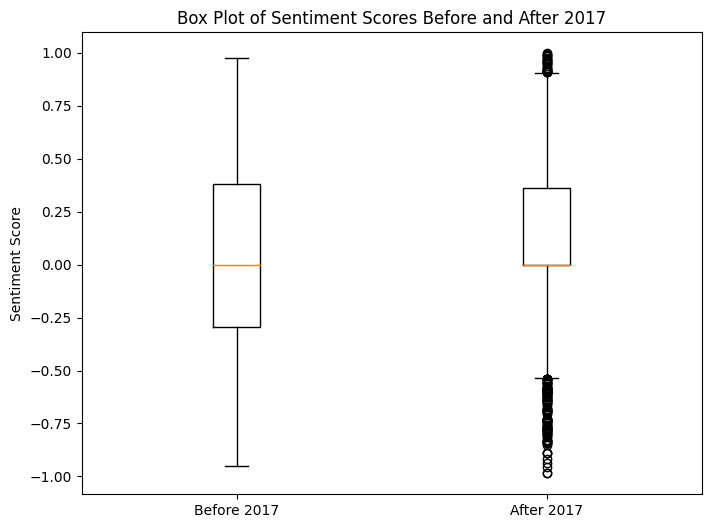

In [ ]:
import matplotlib.pyplot as plt

# Sentiment data for before 2017 and after 2017
sentiments_before_2017 = df_sentiments_pre_2017['sentiment']
sentiments_after_2017 = df_sentiments_post_2017['sentiment']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot with whiskers for both periods
ax.boxplot([sentiments_before_2017, sentiments_after_2017], labels=['Before 2017', 'After 2017'])

# Set the y-axis label
ax.set_ylabel('Sentiment Score')

# Set the title
ax.set_title('Box Plot of Sentiment Scores Before and After 2017')

# Show the plot
plt.show()


## Time Series Historgram

The next step in our analysis is considering sentiment over time. Below we've run code to see how sentiment changed over time in the first period (pre-2017) and we can see that there indeed was an improvement of sentiment. We can likely attribute this to the ending of construction and the imposition that places on local citizens. There were dips in the sentiment during this period however, liekly due to public reports on the outsized cost of the project.

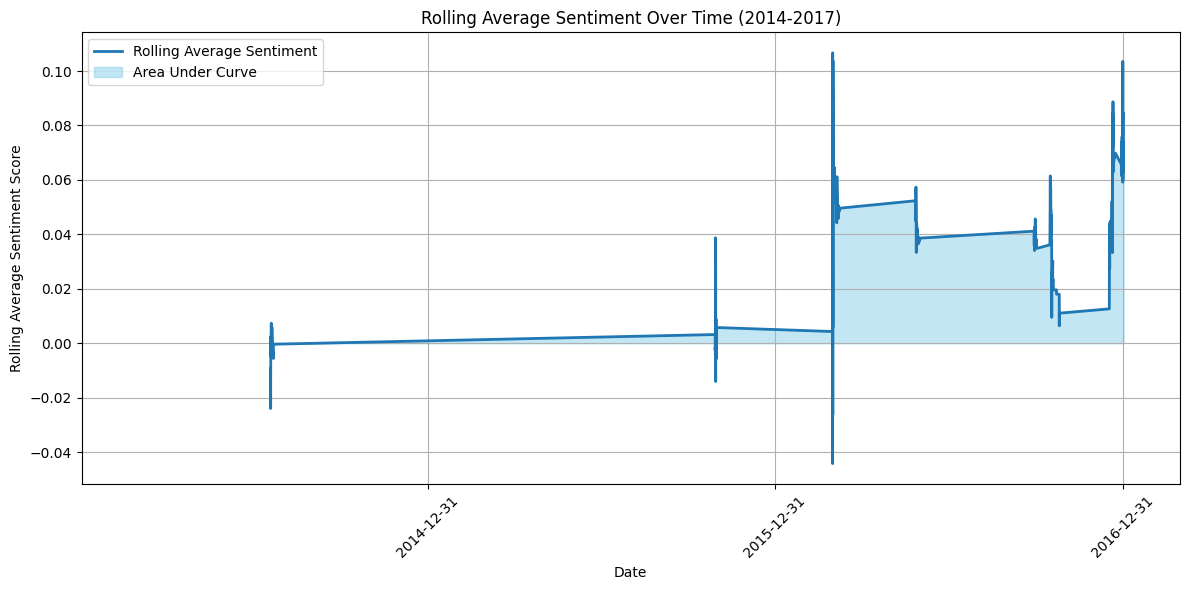

In [ ]:
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates (January 1, 2014 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2017, 3, 1)

# Filter the sentiment scores within the desired date range
filtered_sentiments = df_sentiments_pre_2017[(df_sentiments_pre_2017['creation_date'] >= start_date) &
                                              (df_sentiments_pre_2017['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 180 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2014-2017)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2014-01-01', end='2017-03-01', freq='Y'))
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2017-03-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Time Series Histogram (Part 2)

Now we consider how sentiments changed during the second time period (post-2017). We can see that sentiment was at an all time high immediately after opening, and then dropped markedly at the start of the pandemic, likely due to non-use of transit for some time. As transit ridership has returned however we can see that so has positive public sentiment.

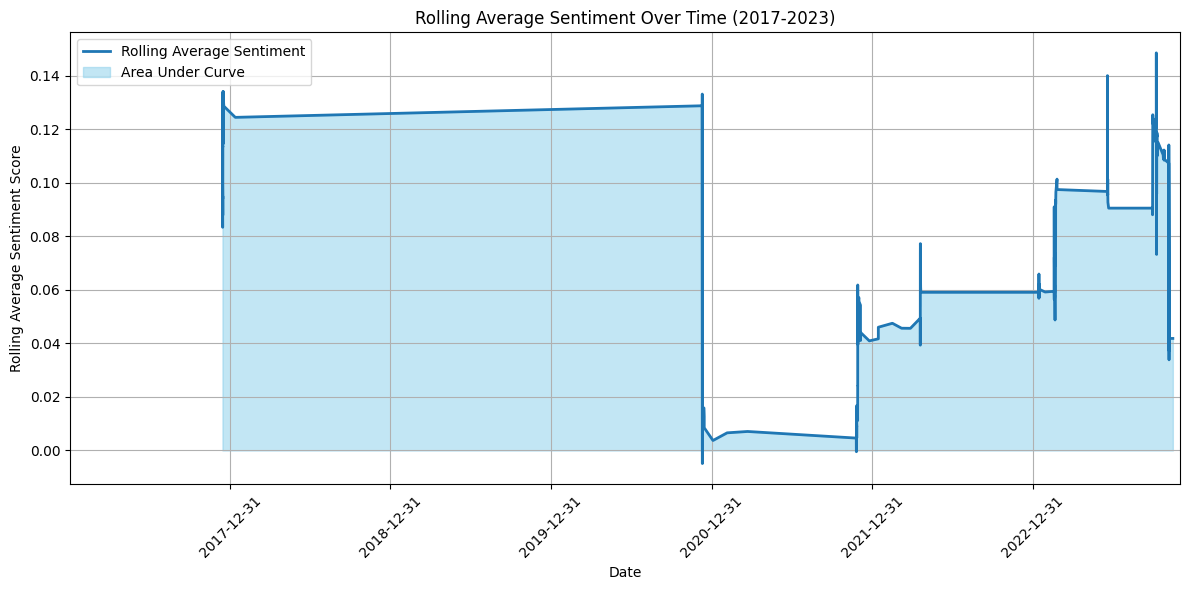

In [ ]:
import datetime
import matplotlib.pyplot as plt

# Convert the 'creation_date' column to datetime format in df_sentiments_post_2017
df_sentiments_post_2017['creation_date'] = pd.to_datetime(df_sentiments_post_2017['creation_date'], unit='s')

# Define the start and end dates (January 1, 2017 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2023, 12, 1)

# Filter the sentiment scores within the desired date range from df_sentiments_post_2017
filtered_sentiments = df_sentiments_post_2017[(df_sentiments_post_2017['creation_date'] >= start_date) &
                                              (df_sentiments_post_2017['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 200 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2017-2023)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2017-01-01', end='2023-12-01', freq='Y'))
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2023-12-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Sentiment Distribution

When we consider a sentiment distribution histogram however, we see that in both time periods the overwhelming amount of comments held a near neutral sentiment score (around 0). Though we recognize that many people may not have particuraly strong feelings about the subway one way or the other, as part of a sentiment analysis it is of interest to us to better understand the range of feelings and comments being expressed by those individuals who lean more towards either side of the spectrum.

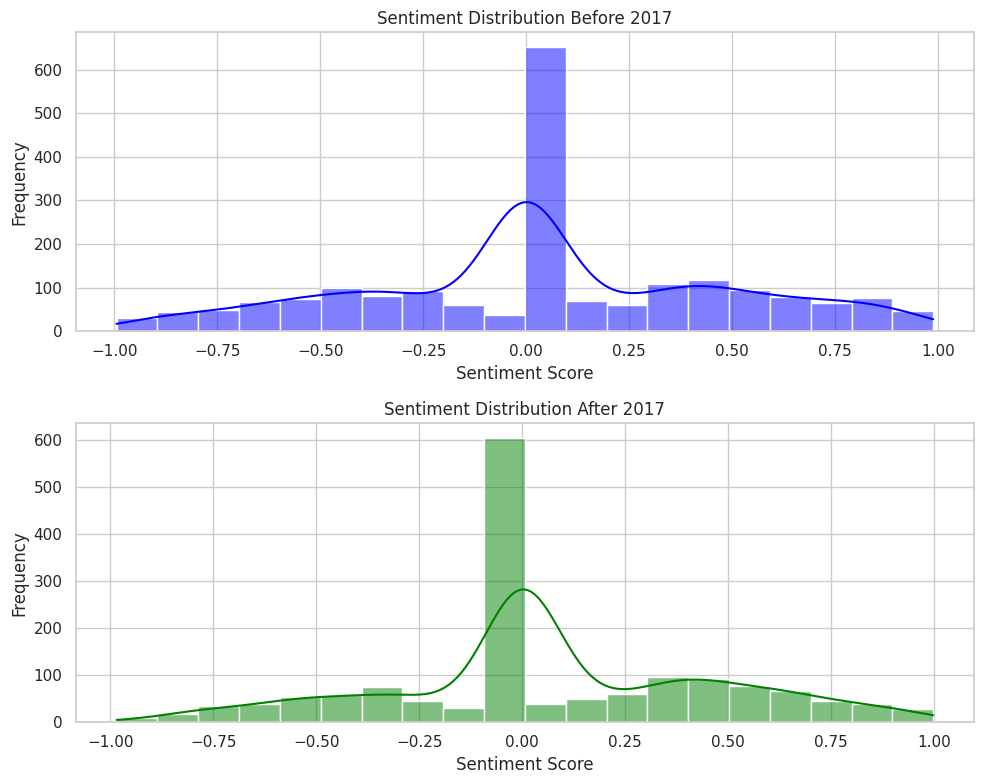

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot histograms for sentiment distribution before 2017
sns.histplot(df_sentiments_pre_2017['sentiment'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("Sentiment Distribution Before 2017")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Frequency")

# Plot histograms for sentiment distribution after 2017
sns.histplot(df_sentiments_post_2017['sentiment'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title("Sentiment Distribution After 2017")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


## The No-Null Data Dsitribution

 As a result of wanting to better understand the sentiments of those individuals who have strong feelings about the Q-Line, regardless of positive vs. negative, we removed those comments that had sentiment scores that were between 0.0000001 and -0.0000001.

In [ ]:
# Remove rows with 'sentiment' values between -0.0000001 and 0.0000001 for data before 2017
df_sentiments_pre_2017_nonull = df_sentiments_pre_2017[(df_sentiments_pre_2017['sentiment'] < -0.0000001) | (df_sentiments_pre_2017['sentiment'] > 0.0000001)]

# Remove rows with 'sentiment' values between -0.0000001 and 0.0000001 for data after 2017
df_sentiments_post_2017_nonull = df_sentiments_post_2017[(df_sentiments_post_2017['sentiment'] < -0.0000001) | (df_sentiments_post_2017['sentiment'] > 0.0000001)]

# Analysis for data before 2017
mean_sentiment_pre_2017_nonull = df_sentiments_pre_2017_nonull['sentiment'].mean()
summary_pre_2017_nonull = df_sentiments_pre_2017_nonull['sentiment'].describe()

# Analysis for data after 2017
mean_sentiment_post_2017_nonull = df_sentiments_post_2017_nonull['sentiment'].mean()
summary_post_2017_nonull = df_sentiments_post_2017_nonull['sentiment'].describe()

# Print results
print("Average Sentiment Before 2017_nonull: ", mean_sentiment_pre_2017_nonull)
print(summary_pre_2017_nonull)
print("\nAverage Sentiment After 2017: ", mean_sentiment_post_2017_nonull)
print(summary_post_2017_nonull)


Average Sentiment Before 2017_nonull:  0.058179971181556184
count    1388.000000
mean        0.058180
std         0.534645
min        -0.994800
25%        -0.401900
50%         0.128000
75%         0.505500
max         0.988500
Name: sentiment, dtype: float64

Average Sentiment After 2017:  0.11929258496395467
count    971.000000
mean       0.119293
std        0.501494
min       -0.985100
25%       -0.318200
50%        0.244900
75%        0.519800
max        0.997300
Name: sentiment, dtype: float64


## Running Our Visualizations Again

This new dataset, which we call the non-null dataset, provides a much clearer picture of some of the sentiment trends across the opinion spectrum such as in our sentiment distribution histogram and whisker box plots below. Overall we can now more clearly see that there are generally more positive then negative comments in both time periods, but the amount of positive comments in the second period is definite increase to the amount of positive comments in the first time period.

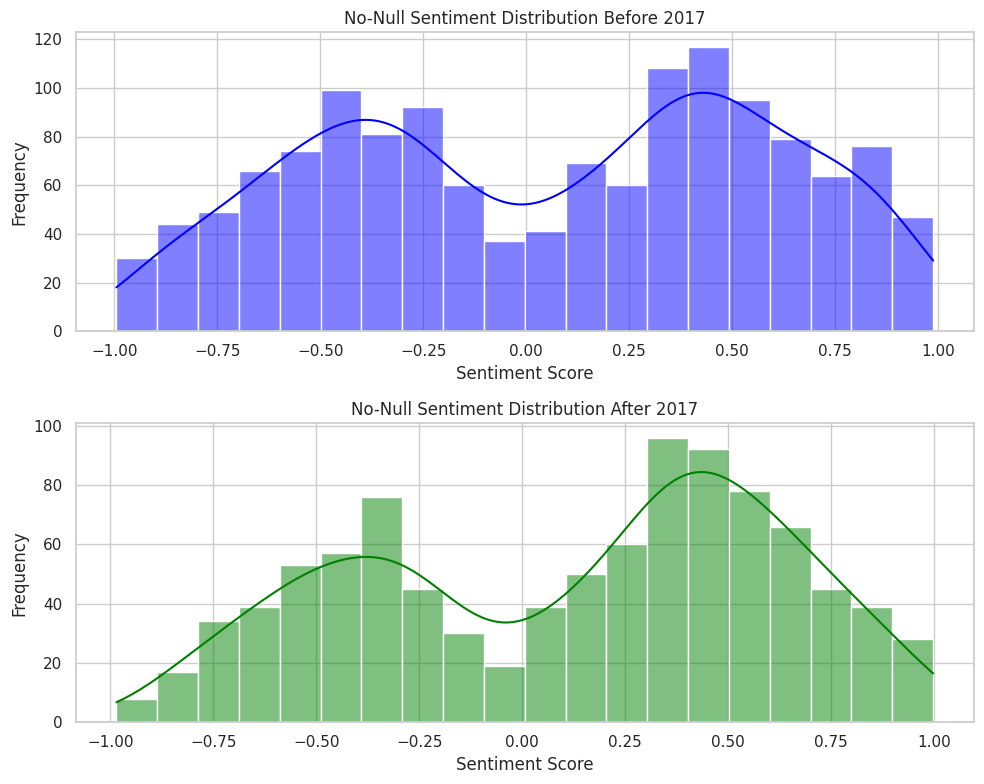

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# Plot histograms for sentiment distribution before 2017
sns.histplot(df_sentiments_pre_2017_nonull['sentiment'], bins=20, kde=True, color='blue', ax=axes[0])
axes[0].set_title("No-Null Sentiment Distribution Before 2017")
axes[0].set_xlabel("Sentiment Score")
axes[0].set_ylabel("Frequency")

# Plot histograms for sentiment distribution after 2017
sns.histplot(df_sentiments_post_2017_nonull['sentiment'], bins=20, kde=True, color='green', ax=axes[1])
axes[1].set_title("No-Null Sentiment Distribution After 2017")
axes[1].set_xlabel("Sentiment Score")
axes[1].set_ylabel("Frequency")

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


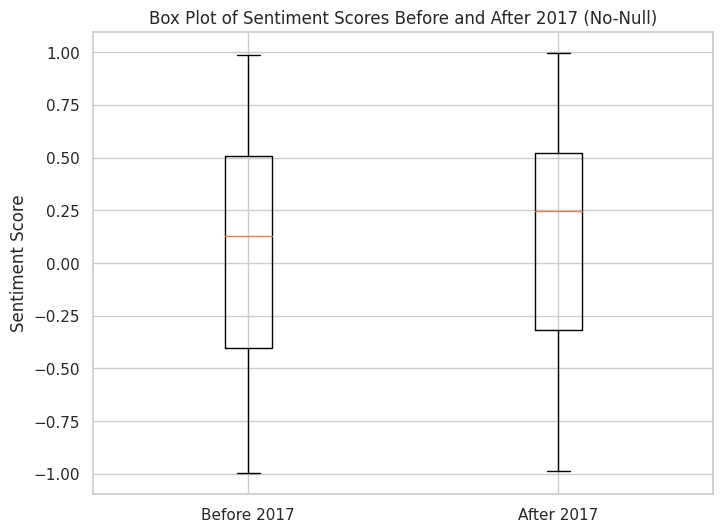

In [ ]:
import matplotlib.pyplot as plt

# Sentiment data for before 2017 and after 2017
sentiments_before_2017 = df_sentiments_pre_2017_nonull['sentiment']
sentiments_after_2017 = df_sentiments_post_2017_nonull['sentiment']

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Create a box plot with whiskers for both periods
ax.boxplot([sentiments_before_2017, sentiments_after_2017], labels=['Before 2017', 'After 2017'])

# Set the y-axis label
ax.set_ylabel('Sentiment Score')

# Set the title
ax.set_title('Box Plot of Sentiment Scores Before and After 2017 (No-Null)')

# Show the plot
plt.show()


## Comparing Our Time Series Analysis

Compared to our previous time series histogram for the first time period, we can now see that the rolling averages skew slightly more towards the negative initially but over-time becomes more positive then previously.

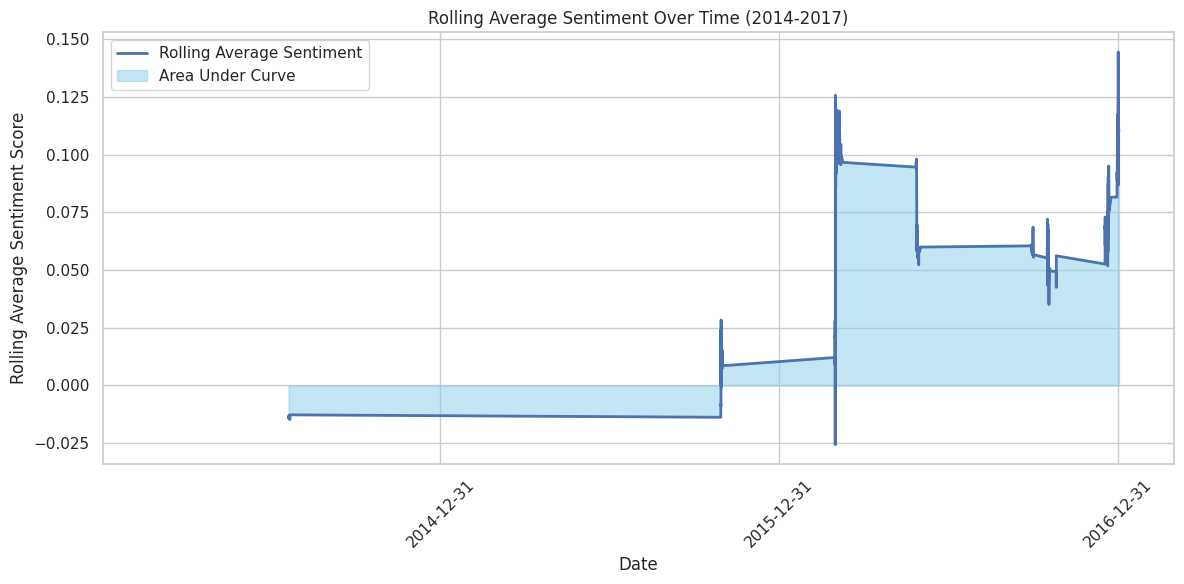

In [ ]:
import datetime
import matplotlib.pyplot as plt

# Define the start and end dates (January 1, 2014 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2014, 1, 1)
end_date = datetime.datetime(2017, 3, 1)

# Filter the sentiment scores within the desired date range
filtered_sentiments = df_sentiments_pre_2017_nonull[(df_sentiments_pre_2017_nonull['creation_date'] >= start_date) &
                                              (df_sentiments_pre_2017_nonull['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 180 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2014-2017)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2014-01-01', end='2017-03-01', freq='Y'))
plt.xlim(pd.Timestamp('2014-01-01'), pd.Timestamp('2017-03-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## Comparing Our Time Series Analysis (Part 2)

Again, compared to our previous time series histogram for the second time period, we can now see that the rolling averages skew more positive then they previously did, indicating that those individuals that expressed a non-neutral opinion were overall more positive then not.

<ipython-input-111-ceca18a1139e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sentiments_post_2017_nonull['creation_date'] = pd.to_datetime(df_sentiments_post_2017['creation_date'], unit='s')


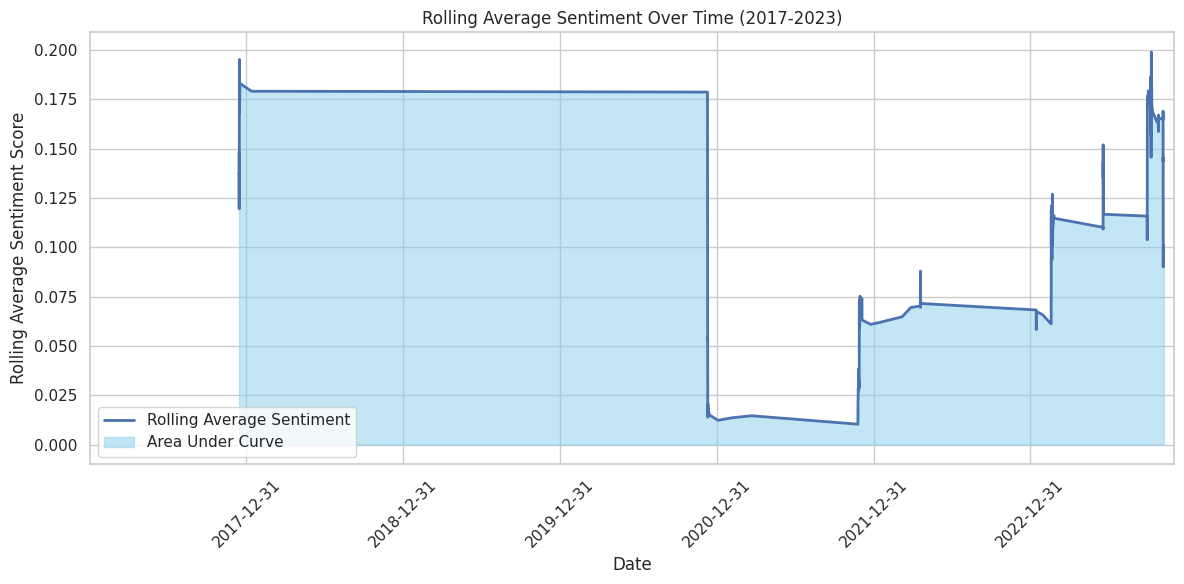

In [ ]:
import datetime
import matplotlib.pyplot as plt

# Convert the 'creation_date' column to datetime format in df_sentiments_post_2017
df_sentiments_post_2017_nonull['creation_date'] = pd.to_datetime(df_sentiments_post_2017['creation_date'], unit='s')

# Define the start and end dates (January 1, 2017 to December 1, 2023) as datetime objects
start_date = datetime.datetime(2017, 1, 1)
end_date = datetime.datetime(2023, 12, 1)

# Filter the sentiment scores within the desired date range from df_sentiments_post_2017
filtered_sentiments = df_sentiments_post_2017_nonull[(df_sentiments_post_2017_nonull['creation_date'] >= start_date) &
                                              (df_sentiments_post_2017_nonull['creation_date'] <= end_date)]

# Sort the DataFrame by creation_date
filtered_sentiments = filtered_sentiments.sort_values(by='creation_date')

# Calculate a rolling mean of sentiment scores over a specified window (e.g., 200 days)
rolling_mean = filtered_sentiments['sentiment'].rolling(window=200).mean()

# Create a line plot for the rolling mean sentiment scores over time
plt.figure(figsize=(12, 6))

# Plot the rolling mean line
plt.plot(filtered_sentiments['creation_date'], rolling_mean, linestyle='-', linewidth=2, label='Rolling Average Sentiment')

# Fill the area under the rolling mean line with color
plt.fill_between(filtered_sentiments['creation_date'], rolling_mean, color='skyblue', alpha=0.5, label='Area Under Curve')

plt.title("Rolling Average Sentiment Over Time (2017-2023)")
plt.xlabel("Date")
plt.ylabel("Rolling Average Sentiment Score")
plt.grid(True)
plt.legend()

# Customize the x-axis to show years
plt.xticks(pd.date_range(start='2017-01-01', end='2023-12-01', freq='Y'))
plt.xlim(pd.Timestamp('2017-01-01'), pd.Timestamp('2023-12-01'))

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


## TF-IDF Words

After mutliple iterations of the below code and the removal of dozen custom stop words, we were able to realize some of the frequent terms being used by Reddit commenters, both positive and negative. Some interesting observations:

On the positive side, we have words such as "easy", "fast", "great", "best", "Tokyo", "Paris", "safety". All words that self-evidently express approval and a relation to some of the other strong global transit networks. On the negative side we had words such as : corruption, traffic, labor, bad, dollars, expensive, bad, and a variety of swear words.


In [1]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import string

# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define custom stopwords
custom_stopwords = set([
    "like", "get", "would", "much", "know", "even", "way", "really", "think", "could", "make", "go", "need", "lot",
    "people", "one", "time", "also", "well", "something", "see", "less", "take", "every", "actually", "things",
    "shit", "two", "done", "day", "around", "use", "first",
    "work", "cost", "NYC", "new", "city", "construction", "MTA", "costs", "Manhattan", "station", "years", "going",
    "system", "project", "good", "better", "built", "expensive", "money", "many", "want", "pretty", "York", "projects",
    "sure", "lines", "train", "https", "still", "workers", "building", "build", "trains", "Avenue", "back", "Paris",
    "far", "tunnel", "never", "side", "pay", "since", "right", "cities", "long", "per", "stop", "bus", "street",
    "hour", "fucking", "problem", "mile", "infrastructure", "Brooklyn", "run", "tunnels", "point", "system"
    # Add more custom stopwords if needed
])

# Separate positive and negative comments based on sentiment score
positive_comments = []
negative_comments = []

# Filter comments based on sentiment score and add to respective lists
for comment in df_sentiments_pre_2017_nonull['comment']:
    sentiment_score = sia.polarity_scores(comment)['compound']
    if sentiment_score > 0.8 or sentiment_score < -0.8:
        if sentiment_score > 0:
            positive_comments.append(comment)
        else:
            negative_comments.append(comment)

# Tokenize words in positive and negative comments
positive_words = nltk.word_tokenize(" ".join(positive_comments))
negative_words = nltk.word_tokenize(" ".join(negative_comments))

# Define stop words and punctuation to remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Remove stop words, custom stopwords, and punctuation from the word lists
filtered_positive_words = [word for word in positive_words if word.lower() not in (stop_words | custom_stopwords) and word.isalpha() and word not in punctuation]
filtered_negative_words = [word for word in negative_words if word.lower() not in (stop_words | custom_stopwords) and word.isalpha() and word not in punctuation]

# Count word frequencies in filtered positive and negative comments
positive_word_freq = Counter(filtered_positive_words)
negative_word_freq = Counter(filtered_negative_words)

# Get the top 20 most common words for each sentiment
top_20_positive_words = positive_word_freq.most_common(50)
top_20_negative_words = negative_word_freq.most_common(50)

print("Top 20 Most Common Words in Positive Comments (excluding stop words and custom stopwords):")
for word, count in top_20_positive_words:
    print(f"{word}: {count}")

print("\nTop 20 Most Common Words in Negative Comments (excluding stop words and custom stopwords):")
for word, count in top_20_negative_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


NameError: ignored

## Word Cloud

Using the listed words, we were able to generate code that provided both a positive and a negative word cloud to better visualize some of the prevalent themes in this discussion.

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


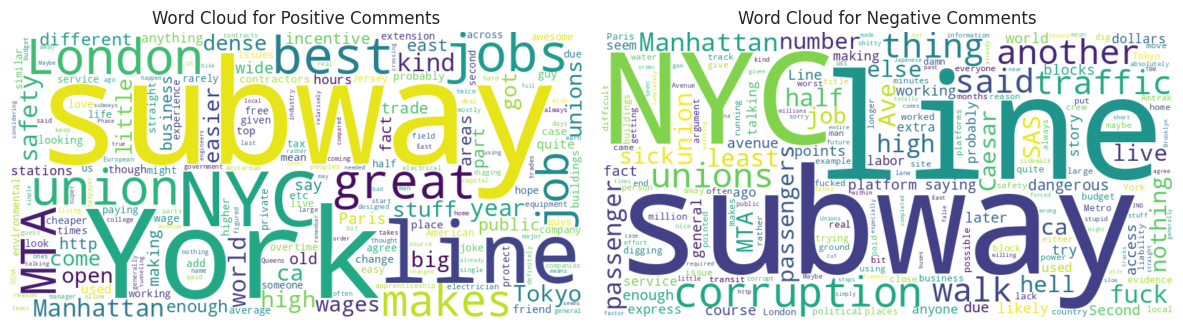

In [ ]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from collections import Counter
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK data (if not already downloaded)
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')

# Initialize SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

# Define custom stopwords
custom_stopwords = set([
    # Add your custom stopwords here
])

# Separate positive and negative comments based on sentiment score
positive_comments = []
negative_comments = []

# Filter comments based on sentiment score and add to respective lists
for comment in df_sentiments_pre_2017_nonull['comment']:
    sentiment_score = sia.polarity_scores(comment)['compound']
    if sentiment_score > 0.8 or sentiment_score < -0.8:
        if sentiment_score > 0:
            positive_comments.append(comment)
        else:
            negative_comments.append(comment)

# Tokenize words in positive and negative comments
positive_words = nltk.word_tokenize(" ".join(positive_comments))
negative_words = nltk.word_tokenize(" ".join(negative_comments))

# Define stop words and punctuation to remove
stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

# Updated custom stopwords
custom_stopwords = set([
    "like", "get", "would", "much", "know", "even", "way", "really", "think", "could", "make", "go", "need", "lot",
    "people", "one", "time", "also", "well", "something", "see", "less", "take", "every", "actually", "things",
    "shit", "two", "done", "day", "around", "use", "first",
    "work", "cost", "NYC", "new", "city", "construction", "MTA", "costs", "Manhattan", "station", "years", "going",
    "system", "project", "good", "better", "built", "expensive", "money", "many", "want", "pretty", "York", "projects",
    "sure", "lines", "train", "https", "still", "workers", "building", "build", "trains", "Avenue", "back", "Paris",
    "far", "tunnel", "never", "side", "pay", "since", "right", "cities", "long", "per", "stop", "bus", "street",
    "hour", "fucking", "problem", "mile", "infrastructure", "Brooklyn", "run", "tunnels", "point", "system"
])

# Remove stop words, custom stopwords, and punctuation from the word lists
filtered_positive_words = [word for word in positive_words if word.lower() not in (stop_words | custom_stopwords) and word.isalpha() and word not in punctuation]
filtered_negative_words = [word for word in negative_words if word.lower() not in (stop_words | custom_stopwords) and word.isalpha() and word not in punctuation]

# Count word frequencies in filtered positive and negative comments
positive_word_freq = Counter(filtered_positive_words)
negative_word_freq = Counter(filtered_negative_words)

# Generate word clouds for positive and negative comments
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(positive_word_freq)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(negative_word_freq)

# Plot the word clouds
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.title("Word Cloud for Positive Comments")
plt.axis('off')

plt.subplot(122)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.title("Word Cloud for Negative Comments")
plt.axis('off')

plt.tight_layout()
plt.show()


#  🚇Discussion and Conclusion 🚇



#  🚇Appendix 🚇

Link to ChatGPT conversation: https://chat.openai.com/share/452acb0d-935f-4c7b-8756-626501b34d3e

I reccomend scrolling down past the initial project proposal brainstorming in order to see my code prompts